# Simple Linear Regression

In [1]:
# Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

----

## Load Dataset

In [7]:
df  = pd.read_csv("dataset/student_scores.csv")

In [8]:
# shape
df.shape

(25, 2)

In [9]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
# top 5 rows in dataframe
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
# statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


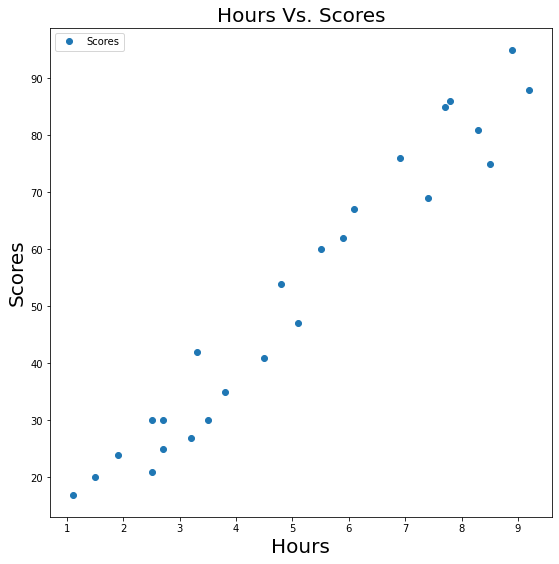

In [15]:
# plot 2-D graph find any relationship between the data
df.plot(x='Hours', y='Scores', style='o', figsize=(9,9))
plt.title('Hours Vs. Scores', fontsize=20)
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.show()

In [16]:
# Preparing the Data
X = df["Hours"].values
y = df["Scores"].values

In [18]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## split this data into training and test sets

In [20]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelling

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model

LinearRegression()

In [ ]:
model.fit()

## Train model

In [26]:
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
 8.9 4.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Reshape Feature

In [27]:
X = X.reshape(-1, 1)

In [29]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train model

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.score(X_test, y_test)

0.9454906892105354

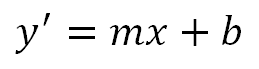

In [33]:
print(model.intercept_)

2.018160041434662


In [34]:
print(model.coef_)

[9.91065648]


In [36]:
print(f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

y = 9.91x + 2.02


In [39]:
model.predict([[8]])

array([81.30341189])

In [41]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [40]:
model.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [42]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [43]:
model.predict([[0]])

array([2.01816004])

In [44]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred).astype(int)})
df

,Actual,Predicted
0,20,17
1,27,34
2,69,75
3,30,27
4,62,60


## Model evaluation

In [45]:
from sklearn import metrics

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


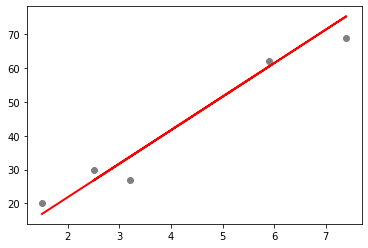

In [48]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()